In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters
gamma = 0.6 # discounting rate
tamanho_recompensa = -1
tamanho_grade = 4
estados_terminais = [[0,0], [tamanho_grade-1, tamanho_grade-1]]
acoes = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numero_iteracoes = 10000

In [3]:
# initialization
V = np.zeros((tamanho_grade, tamanho_grade))
retornos = {(i, j):list() for i in range(tamanho_grade) for j in range(tamanho_grade)}
deltas = {(i, j):list() for i in range(tamanho_grade) for j in range(tamanho_grade)}
estados = [[i, j] for i in range(tamanho_grade) for j in range(tamanho_grade)]

In [4]:
# utils
def gera_episodio():
    estado_inicial = random.choice(estados[1:-1])
    episodio = []
    while True:
        if list(estado_inicial) in estados_terminais:
            return episodio
        acao = random.choice(acoes)
        estado_final = np.array(estado_inicial) + np.array(acao)
        if -1 in list(estado_final) or tamanho_grade in list(estado_final):
            estado_final = estado_inicial
        episodio.append([list(estado_inicial), acao, tamanho_recompensa, list(estado_final)])
        estado_inicial = estado_final

In [5]:
for it in tqdm(range(numero_iteracoes)):
    episodio = gera_episodio()
    G = 0
    #print(episode)
    for i, step in enumerate(episodio[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episodio[::-1][len(episodio)-i:]]:
            idx = (step[0][0], step[0][1])
            retornos[idx].append(G)
            novo_valor = np.average(retornos[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-novo_valor))
            V[idx[0], idx[1]] = novo_valor

 97%|█████████▋| 9716/10000 [00:09<00:00, 981.06it/s] /home/victor/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 10000/10000 [00:10<00:00, 960.69it/s]


In [6]:
V

array([[ 0.        , -1.64063304, -2.22676131, -2.38035614],
       [-1.64294675, -2.09667679, -2.27790931, -2.20785345],
       [-2.22043037, -2.272185  , -2.10276053, -1.61577809],
       [-2.3831479 , -2.21452155, -1.62398829,  0.        ]])

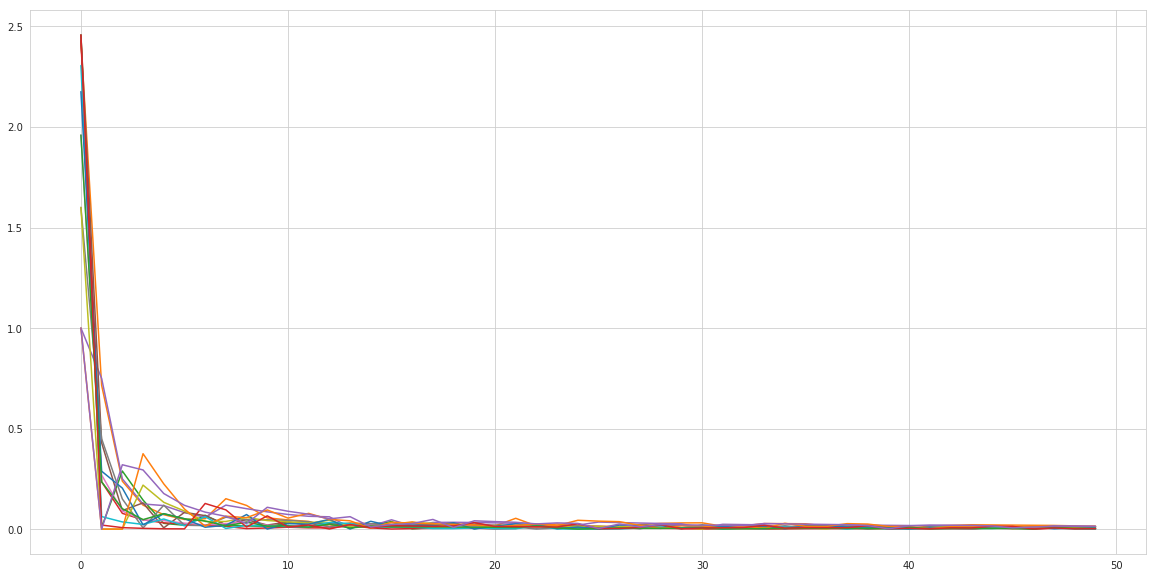

In [7]:
# usando gamma = 1
plt.figure(figsize=(20,10))
todas_series = [list(x)[:50] for x in deltas.values()]
for series in todas_series:
    plt.plot(series)

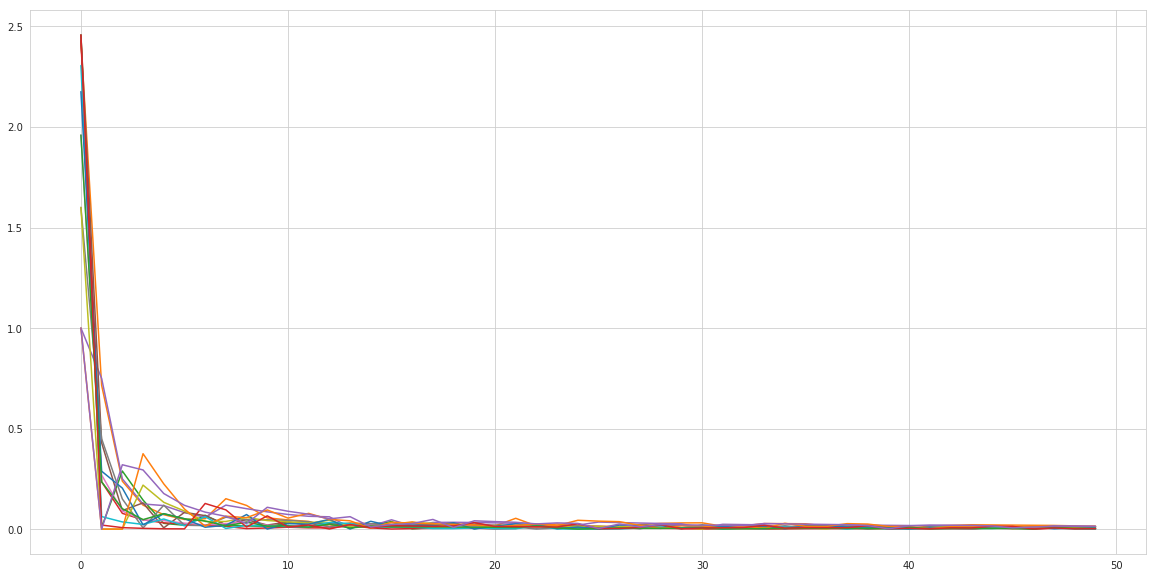

In [8]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
todas_series = [list(x)[:50] for x in deltas.values()]
for series in todas_series:
    plt.plot(series)